In [1]:
# On utilise pyplot pour faire des graphes
%matplotlib inline
import matplotlib.pyplot as plt
# Pour faire des calculs et générer des nombres aléatoires on utilise numpy
import numpy as np
# Pour faire des stats on utilise seaborn
import seaborn as sns
sns.set()

# 1. Générer des nombres aléatoires
## 1.1. Tirage aléatoire uniforme (0, 1)

In [2]:
np.random.uniform()

0.04725195728309006

## 1.2. Pile ou face

In [3]:
np.random.choice(['pile', 'face'], p=[0.1,0.9])

'face'

In [12]:
# On lance 100 pile ou face pour voir combien de pile on obtient
y = 0
for i in range(0,100):
    if np.random.choice(['pile', 'face']) == 'pile':
        y = y + 1
        
print(y)

47


In [16]:
# On peut également demander à la méthode choice() de faire plusieurs lancers
np.sum(np.random.choice(['pile', 'face'], size=100) == 'pile')

57

In [24]:
# On peut également en faire une fonction (p permet de plomber la pièce, voir plus bas)
def nb_piles(nb_tirage=100, p=None):
    return np.sum(np.random.choice(['pile', 'face'], size=nb_tirage, p=p) == 'pile')
    
for i in range(5):
    print(nb_piles())

49
64
56
44
46


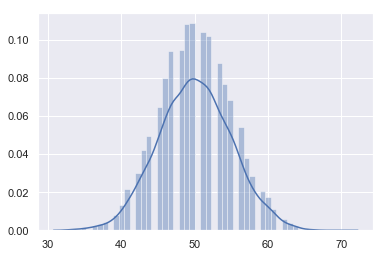

In [25]:
# On va générer une courbe pour voir la répartition des tirages
stats = [nb_piles() for i in range(10000)]

sns.distplot(stats)

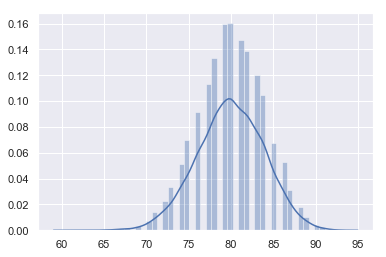

In [26]:
# On va générer une autre courbe pour voir la répartition des tirages en cas de pièce plombée (80%-20%)
stats = [nb_piles(p=[0.8, 0.2]) for i in range(10000)]

sns.distplot(stats)

## 1.3. Loi uniforme

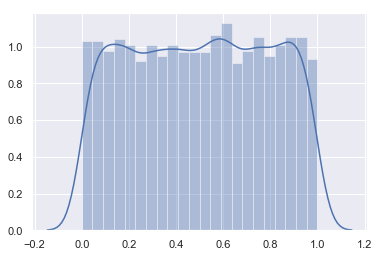

In [28]:
# On effectue 10000 tirages aléatoires et on génère un graphe à partir des résultats
stats = np.random.uniform(size=10000)
sns.distplot(stats)

## 1.4. Loi exponentielle

In [30]:
# Cela représente le temps entre deux requêtes à un serveur
np.random.exponential(size=5)

array([0.53684817, 0.93799375, 0.2107074 , 0.53437207, 1.04962229])

In [74]:
tempsCalcul = 1.0
stats = []

def temps_attente(n):
    if n == 0:
        stats.append(tempsCalcul)
        return tempsCalcul
    temps = np.random.exponential()
    if temps > tempsCalcul:
        res = tempsCalcul + max(temps_attente(n - 1) - temps, 0)
    else:
        res = temps_attente(n - 1) + tempsCalcul - temps
    stats.append(res)
    return res

temps_attente(100)

6.01356388459225

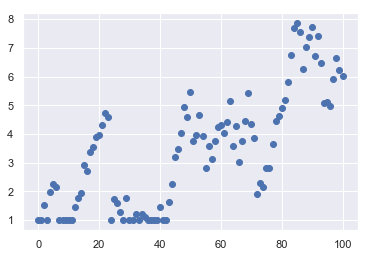

In [75]:
# On fait un graphe avec les résultats
plt.scatter(range(len(stats)), stats)

# 2. Régression (dans un but de prévision)

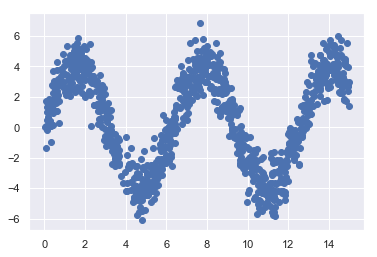

In [82]:
# On va tracer un graphe sinusoïdal
nb = 1000

# Le random ajoute du "bruit" aux données
x = np.random.uniform(low = 0.0, high = 15.0, size = nb)
y = 4.0 * np.sin(x) + np.random.normal(size = nb)

plt.scatter(x, y)

In [83]:
# On importe la lib de régression linéaire de SciKit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# On définit X et y
X = x.reshape(-1, 1)
y = y

# On éclate le jeu de données en entrainement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Instanciation du regresseur
reg = LinearRegression()

# Apprentissage
reg.fit(X_train, y_train)
# Prédiction
y_pred = reg.predict(X_test)

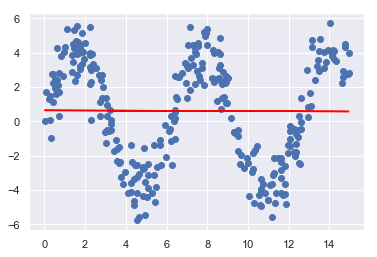

In [85]:
# On fait un graphe
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')